<a href="https://colab.research.google.com/github/jhyun90/ML-with-python/blob/master/fastai_image_classification_pet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64

# Looking at the data

In [0]:
path = untar_data(URLs.PETS)

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [0]:
filename = get_image_files(path_img)
filename[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_199.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_164.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_156.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/beagle_124.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_76.jpg')]

In [0]:
np.random.seed(2)
pattern = r'/([^/]+)_\d+.jpg$'

# Loading the data

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames=filename, pat=pattern, ds_tfms=get_transforms(),size=224,bs=bs).normalize(imagenet_stats)

In [0]:
type(data)

fastai.vision.data.ImageDataBunch

In [0]:
data

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
german_shorthaired,pomeranian,scottish_terrier,beagle,pomeranian
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
saint_bernard,Bombay,Siamese,keeshond,american_pit_bull_terrier
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

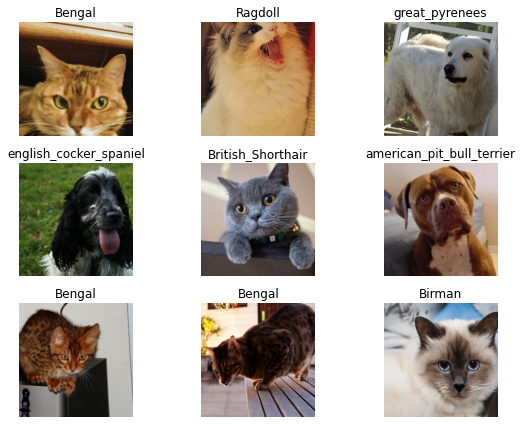

In [0]:
data.show_batch(rows=3, figsize=(8,6))

In [0]:
print(data.classes)
len(data.classes), data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

# Training a neural net in fast.ai (Training: resnet34)



In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

*   models.resnet34 — Resnet34 (Pretrained Model)
*   error_rate — defines the error of the model on validation set
*   bs — batch size

In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

# Transfer learning

In [0]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.526001,0.361795,0.110284,00:44
1,0.670361,0.326560,0.102165,00:44
2,0.418926,0.254703,0.091340,00:44
3,0.301845,0.224009,0.069689,00:43
4,0.240161,0.211481,0.066982,00:44


In [0]:
learn.save('stage-1')

# Validation

In [0]:
interp = ClassificationInterpretation.from_learner(learn=learn)
losses, idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

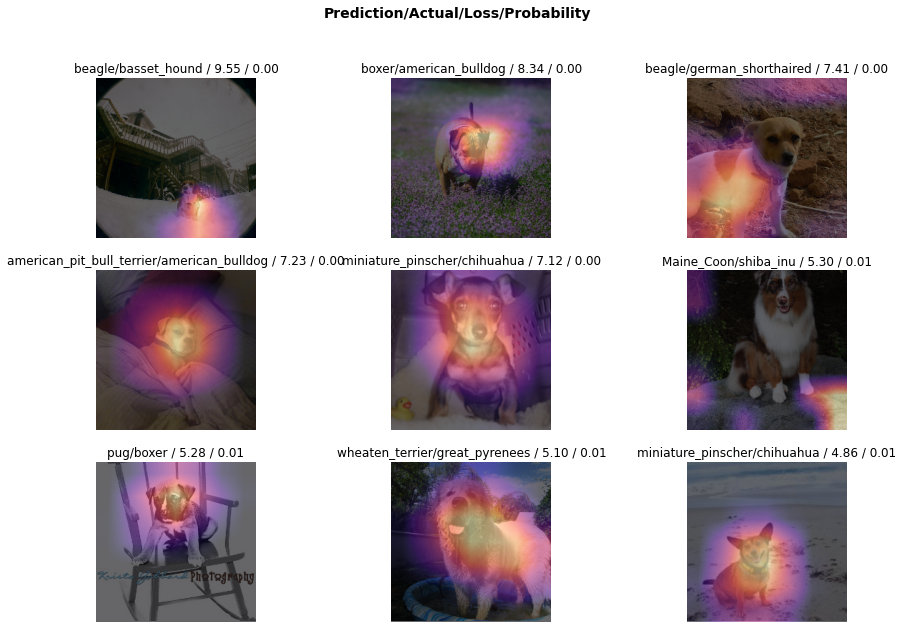

In [0]:
interp.plot_top_losses(9, figsize=(15,10), heatmap=True)

## A confusion matrix plotting all misclassifications

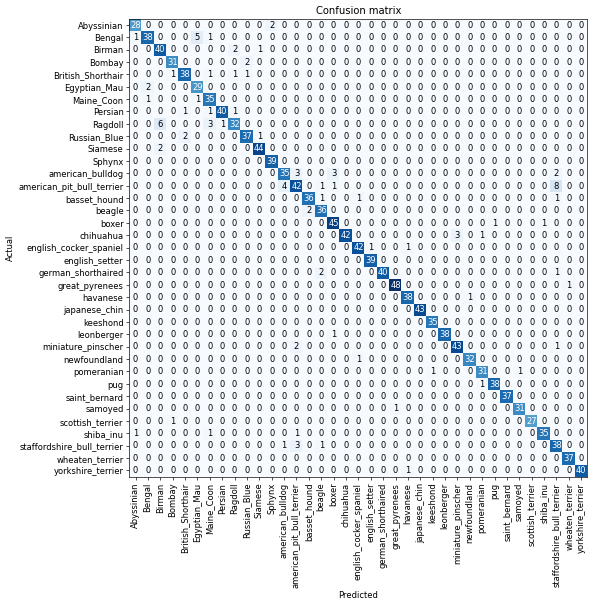

In [0]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

In [0]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 8),
 ('Ragdoll', 'Birman', 6),
 ('Bengal', 'Egyptian_Mau', 5),
 ('american_pit_bull_terrier', 'american_bulldog', 4),
 ('Ragdoll', 'Maine_Coon', 3),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('american_bulldog', 'boxer', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Abyssinian', 'Sphynx', 2),
 ('Birman', 'Ragdoll', 2),
 ('Bombay', 'Russian_Blue', 2),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('Siamese', 'Birman', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('beagle', 'basset_hound', 2),
 ('german_shorthaired', 'beagle', 2),
 ('miniature_pinscher', 'american_pit_bull_terrier', 2)]

## Model fine-tuning

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


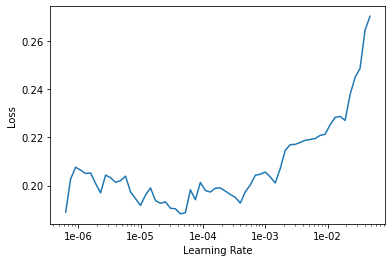

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.206608,0.203780,0.063599,00:44
1,0.190894,0.206448,0.065629,00:45


# Training with ResNet50

In [0]:
# bs = 64

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames=filename, pat=pattern, ds_tfms=get_transforms(), size=299, bs=bs//2).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

# Transfer learning

In [0]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.702724,0.280395,0.096076,01:04
1,0.458203,0.255660,0.088633,01:05
2,0.324560,0.191404,0.064953,01:04
3,0.226794,0.152872,0.058863,01:02
4,0.174952,0.146990,0.051421,01:01


In [0]:
learn.save('stage-1-50')

# Validation

In [0]:
interp = ClassificationInterpretation.from_learner(learn=learn)
losses, idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

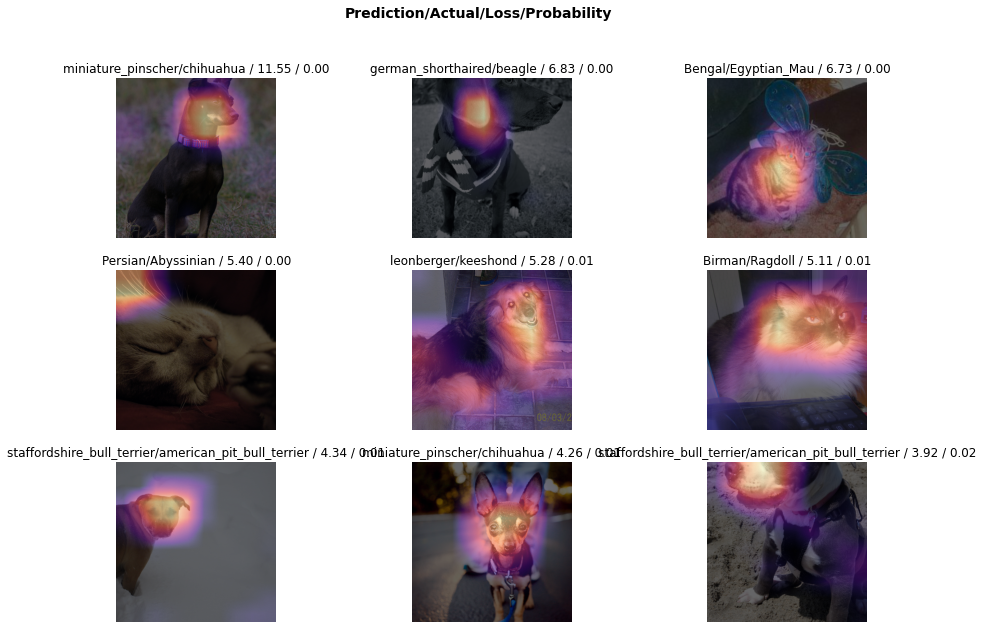

In [0]:
interp.plot_top_losses(9, figsize=(15,10), heatmap=True)

## A confusion matrix plotting all misclassifications

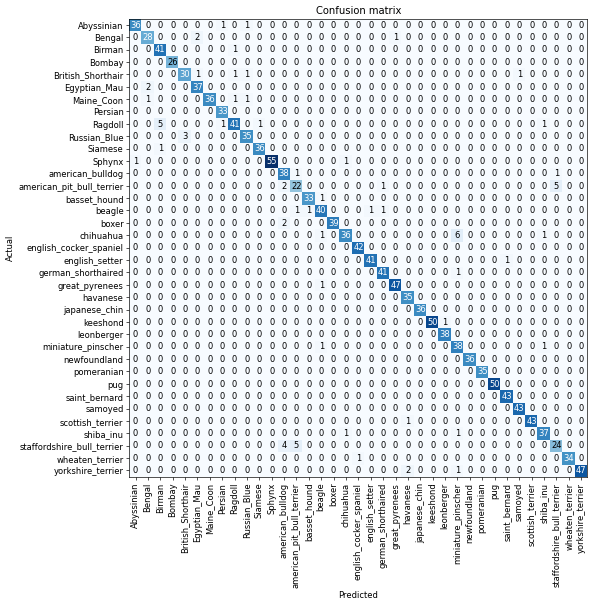

In [0]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

In [0]:
interp.most_confused(min_val=2)

[('chihuahua', 'miniature_pinscher', 6),
 ('Ragdoll', 'Birman', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('staffordshire_bull_terrier', 'american_bulldog', 4),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Egyptian_Mau', 'Bengal', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('boxer', 'american_bulldog', 2),
 ('yorkshire_terrier', 'havanese', 2)]

# Model fine-tuning

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


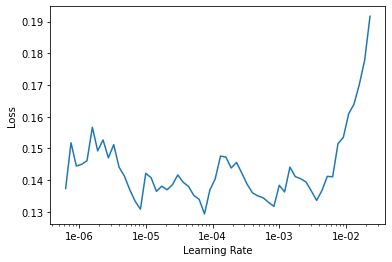

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.159057,0.145211,0.052774,01:08
1,0.120760,0.132588,0.041949,01:07
